In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from glob import glob
import spacy
import re
import string

import matplotlib.pyplot as plt

In [2]:
def clean_text(txt):
    whitespace = string.whitespace
    punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'
    tableWhiteSpace = str.maketrans("", "", whitespace)
    tablePunctuation = str.maketrans("", "", punctuation)
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhiteSpace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

### STEPS

Load Image

Extract Data from Text using Pytesseract

Convert Data into Content

Get Predictions from NER Model

In [3]:
# Load NER Model
model_ner = spacy.load("output/model-best/")

(-0.5, 478.5, 255.5, -0.5)

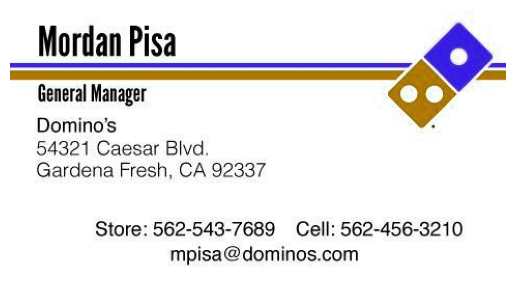

In [4]:
# Load Image

#image = cv2.imread("data/Selected/051.jpeg")
image = cv2.imread("data/Selected/031.jpeg")
                   
plt.imshow(image)
plt.axis("off")

In [5]:
# Extract Data from Text using Pytesseract

tess_data = pytesseract.image_to_data(image)
print(tess_data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	479	256	-1	
2	1	1	0	0	0	26	72	221	91	-1	
3	1	1	1	0	0	27	72	105	22	-1	
4	1	1	1	1	0	27	72	105	22	-1	
5	1	1	1	1	1	27	72	46	17	96	General
5	1	1	1	1	2	79	72	53	22	96	Manager
3	1	1	2	0	0	27	105	75	14	-1	
4	1	1	2	1	0	27	105	75	14	-1	
5	1	1	2	1	1	27	105	75	14	62	Domino's
3	1	1	3	0	0	26	126	221	37	-1	
4	1	1	3	1	0	26	126	165	15	-1	
5	1	1	3	1	1	26	127	49	14	95	54321
5	1	1	3	1	2	84	126	60	15	96	Caesar
5	1	1	3	1	3	151	126	40	15	96	Blvd.
4	1	1	3	2	0	26	147	221	16	-1	
5	1	1	3	2	1	26	147	74	15	96	Gardena
5	1	1	3	2	2	107	148	49	15	96	Fresh,
5	1	1	3	2	3	164	147	25	15	96	CA
5	1	1	3	2	4	195	148	52	14	96	92337
2	1	2	0	0	0	28	9	451	110	-1	
3	1	2	1	0	0	28	9	451	110	-1	
4	1	2	1	1	0	28	9	451	110	-1	
5	1	2	1	1	1	28	16	79	30	92	Mordan
5	1	2	1	1	2	116	16	44	30	96	Pisa
5	1	2	1	1	3	370	9	109	110	0	QP-
2	1	3	0	0	0	83	204	354	42	-1	
3	1	3	1	0	0	83	204	354	42	-1	
4	1	3	1	1	0	83	204	354	15	-1	
5	1	3	1	1	1	83	204	49	15	96	

In [6]:
# Convert into DataFrame
tessList = list(map(lambda x: x.split("\t"), tess_data.split("\n")))

df = pd.DataFrame(tessList[1:], columns=tessList[0])

# remove missing values
df.dropna(inplace=True)

# clean text
df["text"] = df["text"].apply(clean_text)

df[14:22]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
14,4,1,1,3,2,0,26,147,221,16,-1,
15,5,1,1,3,2,1,26,147,74,15,96,gardena
16,5,1,1,3,2,2,107,148,49,15,96,"fresh,"
17,5,1,1,3,2,3,164,147,25,15,96,ca
18,5,1,1,3,2,4,195,148,52,14,96,92337
19,2,1,2,0,0,0,28,9,451,110,-1,
20,3,1,2,1,0,0,28,9,451,110,-1,
21,4,1,2,1,1,0,28,9,451,110,-1,


In [7]:
# Convert Data into Content
df_clean = df.query("text != ''")
content = " ".join([w for w in df_clean["text"]]) # it will take and join each word by one space
print(content)

general manager dominos 54321 caesar blvd. gardena fresh, ca 92337 mordan pisa qp- store 562-543-7689 cell 562-456-3210 mpisa@dominos.com


In [8]:
# Get Predictions from NER Model
doc = model_ner(content)

spacy.displacy.serve(doc, style="ent") # ent -> entities

D:\ANACONDA\envs\docscanner\lib\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [9]:
spacy.displacy.render(doc, style="ent")

### Tagging

In [10]:
doc.to_json()

{'text': 'general manager dominos 54321 caesar blvd. gardena fresh, ca 92337 mordan pisa qp- store 562-543-7689 cell 562-456-3210 mpisa@dominos.com',
 'ents': [{'start': 0, 'end': 7, 'label': 'B-DES'},
  {'start': 8, 'end': 15, 'label': 'I-DES'},
  {'start': 16, 'end': 23, 'label': 'B-ORG'},
  {'start': 107, 'end': 119, 'label': 'B-PHONE'},
  {'start': 120, 'end': 137, 'label': 'B-EMAIL'}],
 'tokens': [{'id': 0, 'start': 0, 'end': 7},
  {'id': 1, 'start': 8, 'end': 15},
  {'id': 2, 'start': 16, 'end': 23},
  {'id': 3, 'start': 24, 'end': 29},
  {'id': 4, 'start': 30, 'end': 36},
  {'id': 5, 'start': 37, 'end': 41},
  {'id': 6, 'start': 41, 'end': 42},
  {'id': 7, 'start': 43, 'end': 50},
  {'id': 8, 'start': 51, 'end': 56},
  {'id': 9, 'start': 56, 'end': 57},
  {'id': 10, 'start': 58, 'end': 60},
  {'id': 11, 'start': 61, 'end': 66},
  {'id': 12, 'start': 67, 'end': 73},
  {'id': 13, 'start': 74, 'end': 78},
  {'id': 14, 'start': 79, 'end': 82},
  {'id': 15, 'start': 83, 'end': 88},
 

In [11]:
docjson = doc.to_json()
docjson.keys()

dict_keys(['text', 'ents', 'tokens'])

In [12]:
doc_text = docjson["text"]
doc_text

'general manager dominos 54321 caesar blvd. gardena fresh, ca 92337 mordan pisa qp- store 562-543-7689 cell 562-456-3210 mpisa@dominos.com'

In [13]:
dataframe_tokens = pd.DataFrame(docjson["tokens"])
dataframe_tokens.head()

,id,start,end
0,0,0,7
1,1,8,15
2,2,16,23
3,3,24,29
4,4,30,36


In [14]:
dataframe_tokens["token"] = dataframe_tokens[["start", "end"]].apply(lambda x:doc_text[x[0]:x[1]], axis=1)

dataframe_tokens.head(10)

,id,start,end,token
0,0,0,7,general
1,1,8,15,manager
2,2,16,23,dominos
3,3,24,29,54321
4,4,30,36,caesar
5,5,37,41,blvd
6,6,41,42,.
7,7,43,50,gardena
8,8,51,56,fresh
9,9,56,57,","


In [15]:
doc_text[18:29]

'minos 54321'

In [16]:
pd.DataFrame(docjson["ents"])

,start,end,label
0,0,7,B-DES
1,8,15,I-DES
2,16,23,B-ORG
3,107,119,B-PHONE
4,120,137,B-EMAIL


In [17]:
pd.DataFrame(docjson["ents"])[["start", "label"]]

,start,label
0,0,B-DES
1,8,I-DES
2,16,B-ORG
3,107,B-PHONE
4,120,B-EMAIL


In [18]:
doc_ents = pd.DataFrame(docjson["ents"])[["start", "label"]]
dataframe_tokens = pd.merge(dataframe_tokens, doc_ents, how="left", on="start")

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,7,general,B-DES
1,1,8,15,manager,I-DES
2,2,16,23,dominos,B-ORG
3,3,24,29,54321,NaN
4,4,30,36,caesar,NaN
5,5,37,41,blvd,NaN
6,6,41,42,.,NaN
7,7,43,50,gardena,NaN
8,8,51,56,fresh,NaN
9,9,56,57,",",NaN


In [19]:
dataframe_tokens.fillna("O", inplace=True)

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,7,general,B-DES
1,1,8,15,manager,I-DES
2,2,16,23,dominos,B-ORG
3,3,24,29,54321,O
4,4,30,36,caesar,O
5,5,37,41,blvd,O
6,6,41,42,.,O
7,7,43,50,gardena,O
8,8,51,56,fresh,O
9,9,56,57,",",O


In [20]:
df_clean.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,27,72,46,17,96,general
5,5,1,1,1,1,2,79,72,53,22,96,manager
8,5,1,1,2,1,1,27,105,75,14,62,dominos
11,5,1,1,3,1,1,26,127,49,14,95,54321
12,5,1,1,3,1,2,84,126,60,15,96,caesar


In [21]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1)

4      8
5      8
8      8
11     6
12     7
13     6
15     8
16     7
17     3
18     6
22     7
23     5
24     4
28     6
29    13
30     5
31    13
33    18
Name: text, dtype: int64

In [22]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1

4       7
5      15
8      23
11     29
12     36
13     42
15     50
16     57
17     60
18     66
22     73
23     78
24     82
28     88
29    101
30    106
31    119
33    137
Name: text, dtype: int64

In [23]:
df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

df_clean.head(10)

C:\Users\my\AppData\Local\Temp\ipykernel_4020\1712280030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
C:\Users\my\AppData\Local\Temp\ipykernel_4020\1712280030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start
4,5,1,1,1,1,1,27,72,46,17,96,general,7,0
5,5,1,1,1,1,2,79,72,53,22,96,manager,15,8
8,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16
11,5,1,1,3,1,1,26,127,49,14,95,54321,29,24
12,5,1,1,3,1,2,84,126,60,15,96,caesar,36,30
13,5,1,1,3,1,3,151,126,40,15,96,blvd.,42,37
15,5,1,1,3,2,1,26,147,74,15,96,gardena,50,43
16,5,1,1,3,2,2,107,148,49,15,96,"fresh,",57,51
17,5,1,1,3,2,3,164,147,25,15,96,ca,60,58
18,5,1,1,3,2,4,195,148,52,14,96,92337,66,61


In [24]:
# to get correct start position
df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

4       0
5       8
8      16
11     24
12     30
13     37
15     43
16     51
17     58
18     61
22     67
23     74
24     79
28     83
29     89
30    102
31    107
33    120
dtype: int64

In [25]:
# inner join with start 

dataframe_info = pd.merge(df_clean, dataframe_tokens[["start", "token", "label"]], how="inner", on="start")
dataframe_info.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,B-DES
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,I-DES
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,B-ORG
3,5,1,1,3,1,1,26,127,49,14,95,54321,29,24,54321,O
4,5,1,1,3,1,2,84,126,60,15,96,caesar,36,30,caesar,O
5,5,1,1,3,1,3,151,126,40,15,96,blvd.,42,37,blvd,O
6,5,1,1,3,2,1,26,147,74,15,96,gardena,50,43,gardena,O
7,5,1,1,3,2,2,107,148,49,15,96,"fresh,",57,51,fresh,O
8,5,1,1,3,2,3,164,147,25,15,96,ca,60,58,ca,O
9,5,1,1,3,2,4,195,148,52,14,96,92337,66,61,92337,O


In [26]:
dataframe_info.tail(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
8,5,1,1,3,2,3,164,147,25,15,96,ca,60,58,ca,O
9,5,1,1,3,2,4,195,148,52,14,96,92337,66,61,92337,O
10,5,1,2,1,1,1,28,16,79,30,92,mordan,73,67,mordan,O
11,5,1,2,1,1,2,116,16,44,30,96,pisa,78,74,pisa,O
12,5,1,2,1,1,3,370,9,109,110,0,qp-,82,79,qp-,O
13,5,1,3,1,1,1,83,204,49,15,96,store,88,83,store,O
14,5,1,3,1,1,2,138,205,118,14,88,562-543-7689,101,89,562,O
15,5,1,3,1,1,3,277,204,36,15,87,cell,106,102,cell,O
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,B-PHONE
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,B-EMAIL


In [27]:
bb_df = dataframe_info.query("label != 'O' ")

bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,B-DES
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,I-DES
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,B-ORG
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,B-PHONE
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,B-EMAIL


### Bounding Box

(-0.5, 478.5, 255.5, -0.5)

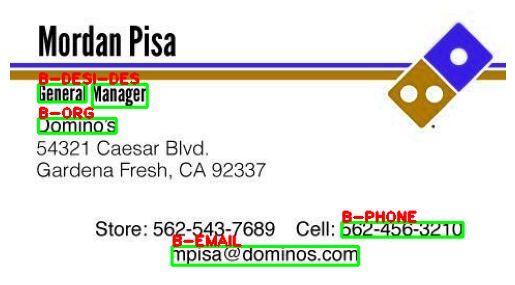

In [28]:
img = image.copy()

for x,y,w,h,label in bb_df[["left","top","width","height","label"]].values:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)
    cv2.putText(img, str(label), (x,y), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
    
plt.imshow(img)
plt.axis("off")

In [29]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,B-DES
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,I-DES
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,B-ORG
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,B-PHONE
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,B-EMAIL


In [30]:
bb_df["label"] = bb_df["label"].apply(lambda x: x[2:])
bb_df

C:\Users\my\AppData\Local\Temp\ipykernel_4020\284535532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["label"] = bb_df["label"].apply(lambda x: x[2:])


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,DES
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,DES
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,ORG
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,PHONE
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,EMAIL


In [31]:
# group the label
class groupgen():
    def __init__(self):
        self.id = 0
        self.text = ""
        
    def getgroup(self, text):
        if self.text == text:
            return self.id
        else:
            self.id += 1
            self.text = text
            return self.id
        
grp_gen = groupgen()

In [32]:
bb_df["group"] = bb_df["label"].apply(grp_gen.getgroup)
bb_df

C:\Users\my\AppData\Local\Temp\ipykernel_4020\119033978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["group"] = bb_df["label"].apply(grp_gen.getgroup)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,DES,1
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,DES,1
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,ORG,2
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,PHONE,3
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,EMAIL,4


In [33]:
# right and bottom of bounding box

bb_df[["left","top","width","height"]] = bb_df[["left","top","width","height"]].astype(int)

bb_df["right"] = bb_df["left"] + bb_df["width"]
bb_df["bottom"] = bb_df["top"] + bb_df["height"]

C:\Users\my\AppData\Local\Temp\ipykernel_4020\2713810823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df[["left","top","width","height"]] = bb_df[["left","top","width","height"]].astype(int)
C:\Users\my\AppData\Local\Temp\ipykernel_4020\2713810823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_df["right"] = bb_df["left"] + bb_df["width"]
C:\Users\my\AppData\Local\Temp\ipykernel_4020\2713810823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [34]:
bb_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group,right,bottom
0,5,1,1,1,1,1,27,72,46,17,96,general,7,0,general,DES,1,73,89
1,5,1,1,1,1,2,79,72,53,22,96,manager,15,8,manager,DES,1,132,94
2,5,1,1,2,1,1,27,105,75,14,62,dominos,23,16,dominos,ORG,2,102,119
16,5,1,3,1,1,4,320,205,117,14,96,562-456-3210,119,107,562,PHONE,3,437,219
17,5,1,3,1,2,1,156,228,180,18,89,mpisa@dominos.com,137,120,mpisa@dominos.com,EMAIL,4,336,246


In [35]:
# tagging: groupby by group

col_group = ["left","top","right","bottom","label","token","group"]

group_tag_img = bb_df[col_group].groupby(by="group")

img_tagging = group_tag_img.agg({
    
    "left": min,
    "right": max,
    "top": min,
    "bottom": max,
    "label": np.unique,
    "token": lambda x: " ".join(x)
    
})

In [36]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,27,132,72,94,[DES],general manager
2,27,102,105,119,[ORG],dominos
3,320,437,205,219,[PHONE],562
4,156,336,228,246,[EMAIL],mpisa@dominos.com


In [37]:
img_tagging["label"] = img_tagging["label"].apply(clean_text)

In [38]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,27,132,72,94,des,general manager
2,27,102,105,119,org,dominos
3,320,437,205,219,phone,562
4,156,336,228,246,email,mpisa@dominos.com


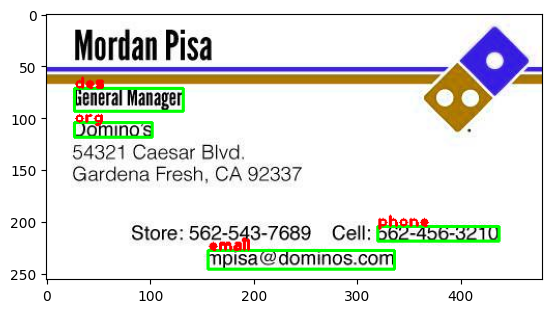

In [39]:
img_bb = image.copy()

for l,r,t,b,label,token in img_tagging.values:
    cv2.rectangle(img_bb, (l,t), (r,b), (0,255,0),2)
    cv2.putText(img_bb, str(label), (l,t), cv2.FONT_HERSHEY_PLAIN, 1, (255,0,0), 2)
    
plt.imshow(img_bb)

# Parser

In [45]:
def parser(text,label):
    if label == "PHONE":
        text = text.lower()
        text = re.sub(r"\D","",text)
    
    elif label == "EMAIL":
        text = text.lower()
        allow_special_char = "@_.\-"
        text = re.sub(r"[^A-Za-z0-9{} ]".format(allow_special_char),"",text)
        
    elif label == "WEB":
        text = text.lower()
        allow_special_char = ":/.%#\-"
        text = re.sub(r"[^A-Za-z0-9{} ]".format(allow_special_char),"",text)
        
    elif label in ("NAME", "DES"):
        text = text.lower()
        allow_special_char = ":/.%#-"
        text = re.sub(r"[^a-z ]","",text)
        text = text.title()
        
    elif label == "ORG":
        text = text.lower()
        allow_special_char = ":/.%#-"
        text = re.sub(r"[^a-z0-9 ]","",text)
        text = text.title()
        
    return text

In [46]:
parser("Erol 123424", "NAME")

'Erol '

In [47]:
parser("i(erols}en)@outlook.com", "EMAIL")

'ierolsen@outlook.com'